# 5.3 Matplotlib

A picture is worth a thousand words, and this holds especially true when working with complex data. Data, on its own, cannot tell its story, but through visualization, we can bring clarity to its patterns and insights. Effective data visualization is a critical part of the research process, allowing researchers to communicate findings clearly. Being a good researcher, therefore, also means being able to create compelling visual representations that make complex information accessible and understandable.

There are a few different Python software packages that help you with visualizing data, for example [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/), or [plotly](https://plotly.com/python/). Please feel free to explore the examples on the websites to see what is possible with these libraries.

For now, we will start with matplotlib, as it is probably the most widely used package out there (and also builds the foundation for e.g. seaborn). Matplotlib was first developed nearly 20 years ago by John Hunter, a postdoctoral researcher in neuroscience at the University of Chicago. Frustrated by proprietary tools for visualizing brain data, he created an open-source alternative. What started as a solo project has since grown into a widely used library across many fields, from visualizing NASA’s Mars landings to Nobel Prize-winning gravitational wave research, and of course, neuroscience data. One of Matplotlib’s strengths is its fine-grained control over the appearance of visualizations. Let’s start with the basics before diving into these details and install matplotlib through the Conda terminal (if you have previously installed the requirements of the Jupyter book it will tell you that it is already installed):

```
pip install matplotlib
```

Matplotlib is a very powerful library with several different interfaces. The one you should almost always use is the `pyplot` module, which you can import with any of the two following two lines of code:

In [1]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

Both ways of importing sub-modules from a library are equivalent and you will encounter both of them in the wild. Then, in its simplest form, we can create a plot by calling the `plt.subplots()` function:

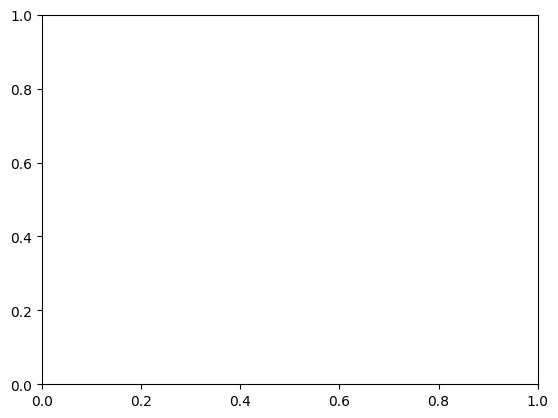

In [2]:
fig, ax = plt.subplots()

You can see that you have created an empty plot. In its simplest form, the `subplots` function is called with no arguments, returning two objects: a Figure container for Axes (`fig`) and an Axes canvas for data (`ax`). The Figure acts as the overall page, holding and organizing multiple Axes objects, while the Axes is where the data is plotted.

## Line plots

To add data, we use methods of the `ax` object. For example, let's plot data from Harry Harlow's 1949 experiments {cite}`Harlow1949`, where animals chose between two options, one rewarded with a treat. Below are the results from three blocks of trials: the first, mid-experiment, and the last block.

In [3]:
trial = [1, 2, 3, 4, 5, 6]
first_block = [50, 51.7, 58.8, 68.8, 71.9, 77.9]
middle_block = [50, 78.8, 83, 84.2, 90.1, 92.7]
last_block = [50, 96.9, 97.8, 98.1, 98.8, 98.7]

As shown in the numbers, performance on the first trial of each block averaged 50%, since the animals had no prior knowledge of which option would be rewarded. After the initial trial, learning began, and their performance gradually improved. In the first block, improvement was slow and challenging, while in the final block, the animals showed rapid improvement. The middle blocks showed moderate progress, neither as slow as the first block nor as fast as the last. Harlow suggested this reflected the animals' ability to "learn to learn" by understanding the task's context—introducing the concept of a learning set. While this description provides some insight, a visual representation is far more revealing. Let’s recreate the graph from Harlow’s classic paper using the `ax.plot` method:

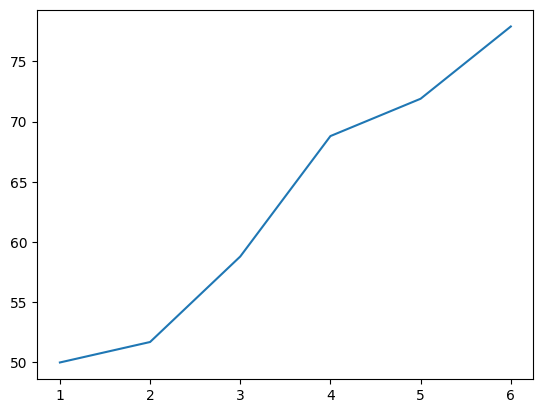

In [4]:
fig, ax = plt.subplots()
ax.plot(trial, first_block)
plt.show()

Calling `ax.plot` adds a line to the plot. The horizontal axis (x-axis) represents the trials within the block, while the vertical axis (y-axis) shows the average percent of correct responses for each trial. This line visualizes the gradual learning that occurs over the first set of trials.

If you'd like to include more data, such as additional trial blocks, you can simply add more lines to the plot. Let’s now see how we can add data for the other blocks to compare performance across them:

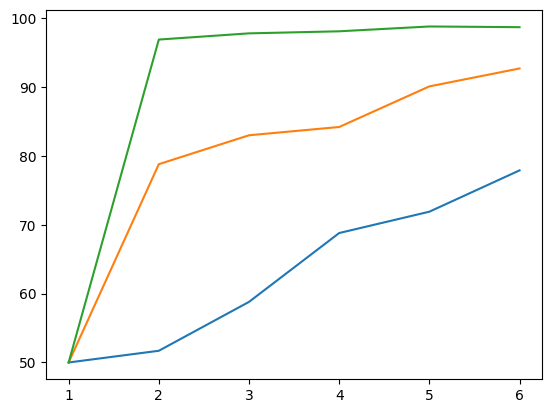

In [5]:
fig, ax = plt.subplots()

ax.plot(trial, first_block)
ax.plot(trial, middle_block)
ax.plot(trial, last_block)

plt.show()

With multiple lines, it quickyl becomes hard do distinguish them. We can improve this by simply adding a legend, labels, and a title:

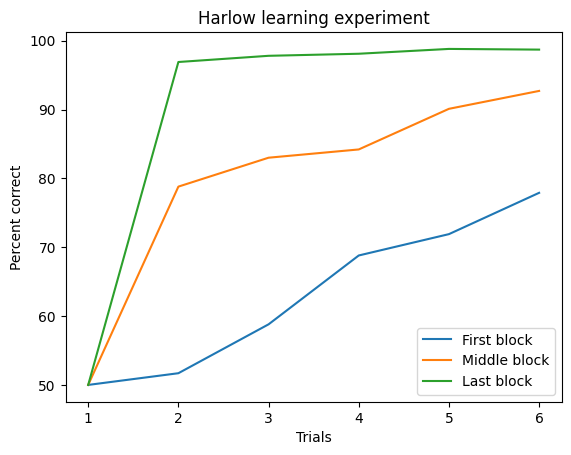

In [6]:
fig, ax = plt.subplots()

ax.plot(trial, first_block, label="First block")
ax.plot(trial, middle_block, label="Middle block")
ax.plot(trial, last_block, label="Last block")

ax.legend()
ax.set(xlabel='Trials', ylabel='Percent correct', title='Harlow learning experiment')

plt.show()

Before we're done, there’s still some customization to improve the clarity of the plot. Right now, the data appears continuous, which is misleading since measurements were only taken at specific trials. We can fix this by adding markers to indicate where the measurements occurred. Each variable can have a different marker, added as keyword arguments in the `plot` call. We'll also set `linestyle='--'` for a dashed line to better reflect the discrete nature of the data:

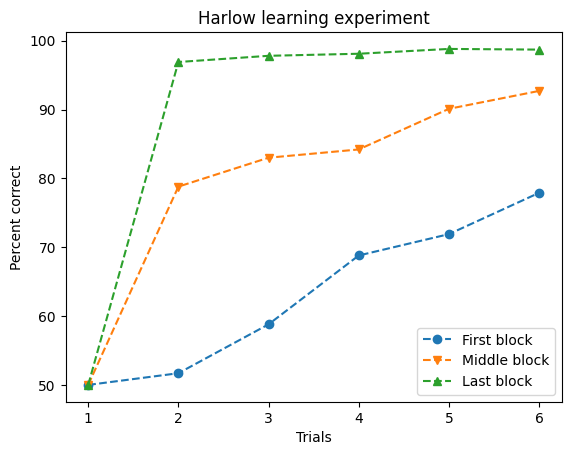

In [7]:
fig, ax = plt.subplots()

ax.plot(trial, first_block, marker='o', linestyle='--', label="First block")
ax.plot(trial, middle_block, marker='v', linestyle='--', label="Middle block")
ax.plot(trial, last_block, marker='^', linestyle='--', label="Last block")

ax.legend()
ax.set(xlabel='Trials', ylabel='Percent correct', title='Harlow learning experiment')

plt.show()

So what if you want so show more than one plot? Even though the previous plot is not too complicated, for the sake of simplicity let us assume that we want to split each set of trials into a different subplot. We can do so by simply specifying the number of plots arguments to the `plt.subplots` function and then indexing the `ax` object:

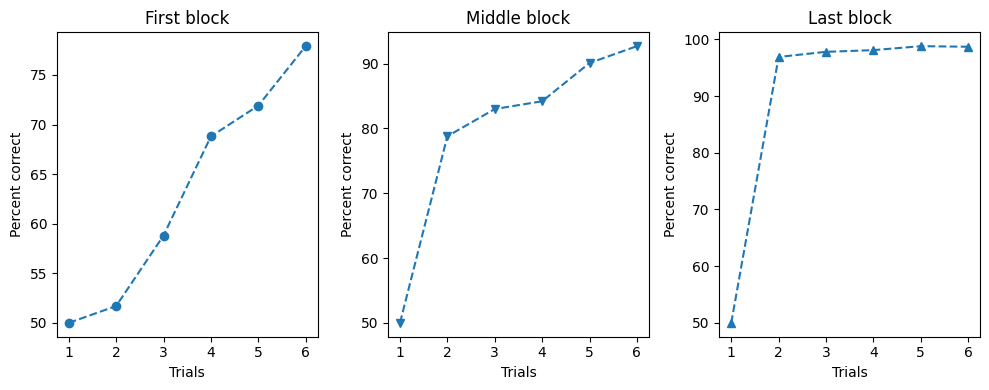

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(10,4))

blocks = [first_block, middle_block, last_block]
labels = ["First block", "Middle block", "Last block"]
markers = ['o', 'v', '^']

for i in range(len(blocks)):
    ax[i].plot(trial, blocks[i], marker=markers[i], linestyle='--', label=labels[i])
    ax[i].set(xlabel='Trials', ylabel='Percent correct', title=f'{labels[i]}')

plt.tight_layout()
plt.show()

*Hint: `plt.tight_layout` tries to automatically adjusts subplot parameters to minimize overlap and ensure that all elements, like labels and titles, fit within the figure boundaries.*

## Scatter plots

A scatter plot displays data points where each marker's position on the x-axis represents a value from one variable, and its position on the y-axis represents a value from another variable. This type of plot allows us to directly compare these two variables and observe overall patterns or trends. For example

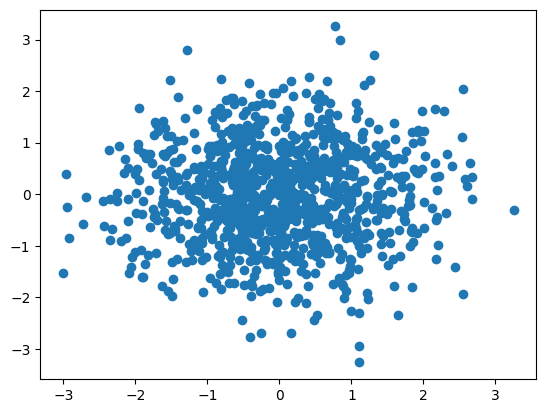

In [9]:
import numpy as np

# Draw 1000 random values from a standard normal distribution
x = np.random.randn(1000)
y = np.random.randn(1000)

fig, ax = plt.subplots()
ax.scatter(x,y)
plt.show()

## Bar plots

A scatter plot displays data points where each marker's position on the x-axis represents a value from one variable, and its position on the y-axis represents a value from another variable. This type of plot allows us to directly compare these two variables and observe overall patterns or trends. For example

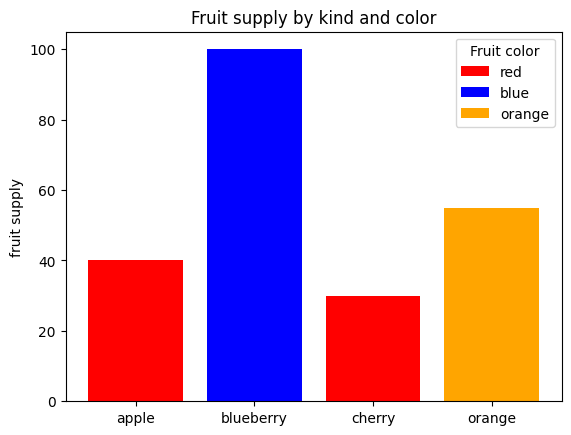

In [10]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange'] # _red makes this a hidden label (so red only appears once)
bar_colors = ['red', 'blue', 'red', 'orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.legend(title='Fruit color')
ax.set(ylabel='fruit supply', title='Fruit supply by kind and color')

plt.show()

## Additional information:

If you look for plots on the internet, you will sometimes also see figures created with `plt.figure()`:

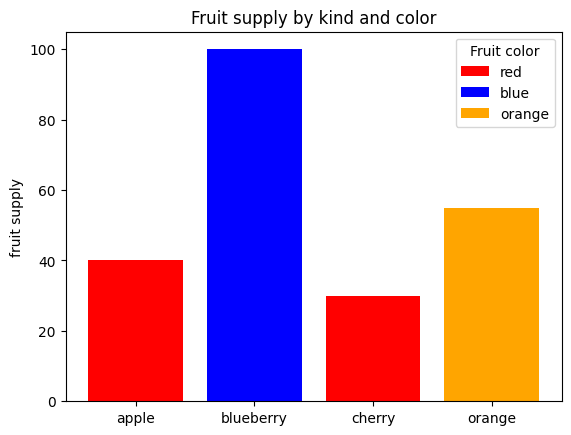

In [11]:
plt.figure()
plt.bar(fruits, counts, label=bar_labels, color=bar_colors)
plt.legend(title='Fruit color')
plt.ylabel('fruit supply')
plt.title('Fruit supply by kind and color')
plt.show()

This is mostly used when you only require a quick and single plot. As it generally offers less flexibility, I would recommend you to use the standard `plt.subplots()` syntax as introduced in this section.

As previously mentioned, the matplotlib library also offers many other ways of visualizing data. If you [explore the examples](https://matplotlib.org/stable/gallery/index.html), you will most likely find a plot similar to the one you need.


## Statistical visualizations

Statistical visualizations help us draw inferences from data or make comparisons between datasets. For this, we’ll use the Seaborn library, which combines the power of Pandas with the flexibility of Matplotlib. To demonstrate statistical visualizations, let's look at the table of subject properties from the Pandas chapter:

In [12]:
import pandas as pd
import seaborn as sns

yeatman_data = pd.read_csv("https://yeatmanlab.github.io/AFQBrowser-demo/data/subjects.csv",
                      usecols=[1,2,3,4,5,6,7],
                      na_values="NaN",
                      index_col=0)
print(yeatman_data.head())

             Age  Gender Handedness     IQ  IQ_Matrix  IQ_Vocab
subjectID                                                      
subject_000   20    Male        NaN  139.0       65.0      77.0
subject_001   31    Male        NaN  129.0       58.0      74.0
subject_002   18  Female        NaN  130.0       63.0      70.0
subject_003   28    Male      Right    NaN        NaN       NaN
subject_004   29    Male        NaN    NaN        NaN       NaN


First, let's compare IQ across different handedness and gender using a bar chart. In this chart, the height of each bar represents the average value of a variable (in this case, IQ) for a group of observations. The position of the bars on the x-axis will differentiate right-handed from left-handed individuals, while the bar color (or hue) will distinguish between male-identified and female-identified individuals:

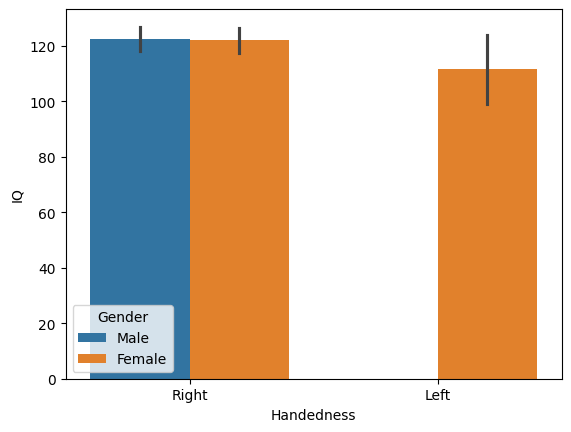

In [13]:
sns.barplot(data=yeatman_data, x="Handedness", y="IQ", hue="Gender")
plt.show()

That’s it! Just one line of code. Seaborn automatically uses the Pandas DataFrame to determine how to split the data, label the axes, and create the legend. It also adds error bars to represent the 95% confidence interval using a method called bootstrapping, which resamples the data to estimate variability. In this case, there are no left-handed males, so their bar is absent.

While bar charts are useful—especially when error bars are included to show data variability—they can be misleading if not used carefully. For instance, Anscombe’s quartet demonstrates that different datasets with identical means and variances can produce identical bar charts, even though the underlying data tell very different stories.

Seaborn offers more informative alternatives. For example, you can display each observation within a group using a swarmplot, or visualize the full distribution with a violin plot, which smooths the data into a silhouette shape. These alternatives provide a clearer picture of the data’s underlying patterns:

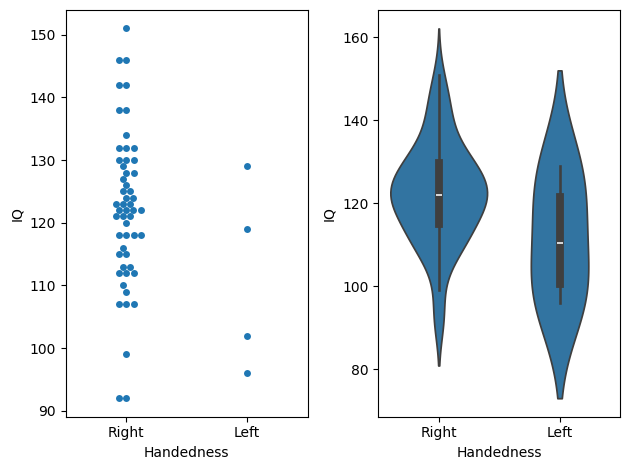

In [14]:
fig, ax = plt.subplots(1, 2)
sns.swarmplot(data=yeatman_data, x="Handedness", y="IQ", ax=ax[0])
sns.violinplot(data=yeatman_data, x="Handedness", y="IQ", ax=ax[1])

plt.tight_layout()
plt.show()

Choosing the right visualization depends on the data. For instance, a swarmplot clearly shows the difference in sample sizes, with more data points for right-handed individuals compared to left-handed ones. However, if the dataset is large, a swarmplot may become overcrowded and hard to interpret, making a violin plot a better choice as it provides a smoother summary of the data distribution. Personal preference also plays a role in selecting visualizations.

Another common option is the boxplot. It displays the median as a vertical line, the quartiles (25th and 75th percentiles) as the bottom and top of a box, and the range as whiskers extending from the box. Outliers—data points far from the quartiles—are shown beyond the whiskers. For example, in the IQ data, a right-handed subject is flagged as an outlier because their score differs from the 25th percentile by more than 1.5 times the interquartile range:

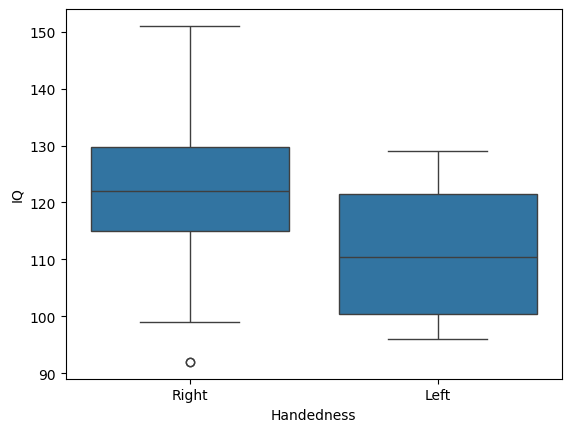

In [15]:
sns.boxplot(data=yeatman_data, x="Handedness", y="IQ")
plt.show()

One advantage of the boxplot is that it conveys a lot of information in a simple format, especially to readers familiar with its conventions. However, like the violin plot, it doesn’t show certain details, such as differences in sample size between groups.

Statistical visualizations can also accompany more advanced analyses. For instance, Seaborn’s `lmplot` function fits a linear model to the data. It displays a scatter plot (e.g., scores from two IQ subtests) along with a linear regression line and a shaded area representing the 95% confidence interval. Additionally, this function can split data by another variable, such as gender, for more detailed insights:

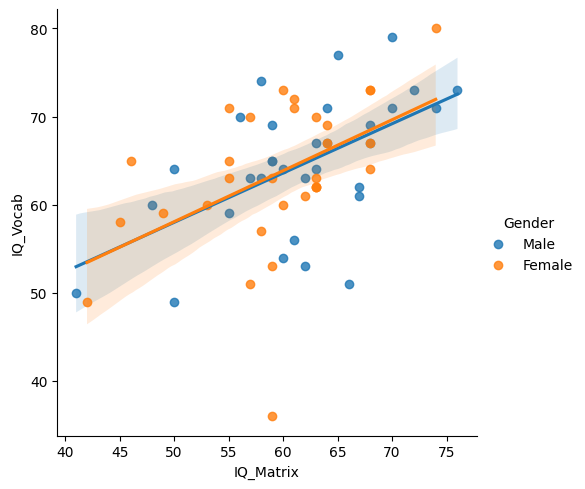

In [16]:
sns.lmplot(data=yeatman_data, x="IQ_Matrix", y="IQ_Vocab", hue="Gender")
plt.show()

As you can see, one of Seaborn’s strengths is its ability to create visuals that are both aesthetically pleasing and highly informative. For most datasets, Seaborn can generate publication-quality figures that are well-suited for reports or scientific papers. While Seaborn excels at creating polished visuals with minimal effort, Matplotlib’s strength lies in its high level of customizability. For more complex or specialized visualizations, the flexibility of Matplotlib allows for detailed adjustments that Seaborn’s default settings may not easily accommodate. Having both tools at your disposal means you can choose between simplicity and full control, depending on the needs of your analysis.

## More plots

Apart from the [matplotlib documentation](https://matplotlib.org/stable/plot_types/index.html) and the [seaborn documentation](https://seaborn.pydata.org/examples/index.html), the [Python graph gallery](https://python-graph-gallery.com/) is a great resource to dive into all kinds of beautiful plots you can do with Python. Have a look around and explore!